# ResNet50

In [1]:
data_dir = 'C:/Users/Administrator.MISS-ZEENAT/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = 'C:/Users/Administrator.MISS-ZEENAT/archive/test/test'

In [17]:
# Define the directory containing the training data
train_dir = 'C:/Users/Administrator.MISS-ZEENAT/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

# Get a list of all class folders
class_folders = [folder for folder in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, folder))]

# Print the list of class folders
print("Class folders:", class_folders)

Class folders: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotte

In [2]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [5]:
import tensorflow
from tensorflow import keras

from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Dense,Flatten,ZeroPadding2D,BatchNormalization,Activation,Add,Input,Dropout,GlobalAveragePooling2D
from keras.optimizers import SGD
from keras.initializers import glorot_uniform
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau


In [6]:

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [7]:
base_model_tf=ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),classes=38)


In [8]:
#Model building
base_model_tf.trainable=False

pt=Input(shape=(224,224,3))
# func=tensorflow.cast(pt,tensorflow.float32)
x=preprocess_input(pt) #This function used to zero-center each color channel wrt Imagenet dataset
model_resnet=base_model_tf(x,training=False)
model_resnet=GlobalAveragePooling2D()(model_resnet)
model_resnet=Dense(128,activation='relu')(model_resnet)
model_resnet=Dense(64,activation='relu')(model_resnet)
model_resnet=Dense(38,activation='softmax')(model_resnet)


model_main=Model(inputs=pt,outputs=model_resnet)
model_main.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item (GetItem)            │ (None, 224, 224)          │               0 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item_1 (GetItem)          │ (None, 224, 224)          │               0 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item_2 (GetItem)          │ (None, 224, 224)          │               0 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stack (Stack)                 │ (None, 224, 224, 3)       │               0 │ get_item[0][0],            │
│                               │                           │                 │ get_item_1[0][0],          │
│                               │                           │                 │ get_item_2[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add (Add)                     │ (None, 224, 224, 3)       │               0 │ stack[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ resnet50 (Functional)         │ (None, 7, 7, 2048)        │      23,587,712 │ add[0][0]                  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_average_pooling2d      │ (None, 2048)              │               0 │ resnet50[0][0]             │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 128)               │         262,272 │ global_average_pooling2d[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 64)                │           8,256 │ dense[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 38)                │           2,470 │ dense_1[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 23,860,710 (91.02 MB)

 Trainable params: 272,998 (1.04 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [9]:
#Image augmentation
train_datagen= ImageDataGenerator(shear_range=0.2,zoom_range=0.2,horizontal_flip=False,vertical_flip=False
                                  ,fill_mode='nearest',width_shift_range=0.2,height_shift_range=0.2)

val_datagen=ImageDataGenerator()

train= train_datagen.flow_from_directory(directory=train_dir,batch_size=32,target_size=(224,224),
                                         color_mode='rgb',class_mode='categorical',seed=42)

valid=val_datagen.flow_from_directory(directory=valid_dir,batch_size=32,target_size=(224,224),color_mode='rgb',class_mode='categorical')



Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [10]:
#CallBacks
es = EarlyStopping(monitor='val_accuracy',verbose=1,patience=7,mode='auto')
mc = ModelCheckpoint(filepath='D:/aunsyedshah/techwiz/FARMACY\FARMACY CODE/models/cnn/model.keras',monitor='val_accuracy',verbose=1,save_best_only=True)
lr = ReduceLROnPlateau(monitor='val_accuracy',verbose=1,patience=5,min_lr=0.001)

<>:3: SyntaxWarning: invalid escape sequence '\F'
<>:3: SyntaxWarning: invalid escape sequence '\F'
C:\Users\Administrator.MISS-ZEENAT\AppData\Local\Temp\ipykernel_10732\2840416495.py:3: SyntaxWarning: invalid escape sequence '\F'
  mc = ModelCheckpoint(filepath='D:/aunsyedshah/techwiz/FARMACY\FARMACY CODE/models/cnn/model.keras',monitor='val_accuracy',verbose=1,save_best_only=True)


In [11]:
model_main.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
#Training
model_main.fit(train,validation_data=valid,epochs=7,steps_per_epoch=200,verbose=1,callbacks=[mc,es,lr])

Epoch 1/7


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4016 - loss: 2.2775
Epoch 1: val_accuracy improved from -inf to 0.83166, saving model to D:/aunsyedshah/techwiz/FARMACY\FARMACY CODE/models/cnn/model.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 2579s 13s/step - accuracy: 0.4027 - loss: 2.2733 - val_accuracy: 0.8317 - val_loss: 0.5386 - learning_rate: 0.0010
Epoch 2/7
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8403 - loss: 0.5226
Epoch 2: val_accuracy improved from 0.83166 to 0.87873, saving model to D:/aunsyedshah/techwiz/FARMACY\FARMACY CODE/models/cnn/model.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 2674s 13s/step - accuracy: 0.8404 - loss: 0.5223 - val_accuracy: 0.8787 - val_loss: 0.3679 - learning_rate: 0.0010
Epoch 3/7
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8864 - loss: 0.3683
Epoch 3: val_accuracy improved from 0.87873 to 0.91082, saving model to D:/aunsyedshah/techwiz/FARMACY\FARMACY CODE/models/cnn/model.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 2592s 13s/step - accuracy: 

In [13]:
model_main.save("RESNET50_PLANT_DISEASE.h5")

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
from PIL import Image

Text(0.5, 1.0, 'loss')

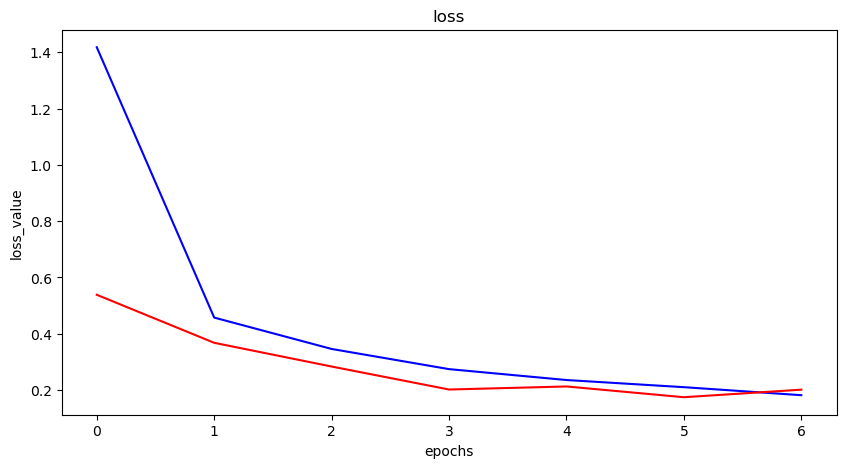

In [15]:
plt.figure(figsize=(10,5))
plt.plot(model_main.history.history['loss'],color='b',label='Training loss')
plt.plot(model_main.history.history['val_loss'],color='r',label='Validation loss')
plt.xlabel("epochs")
plt.ylabel("loss_value")
plt.title("loss")


Text(0.5, 1.0, 'accuracy graph')

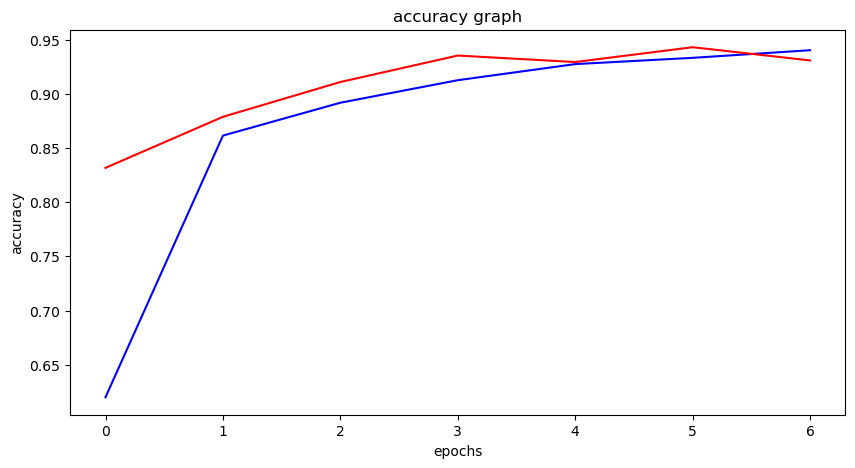

In [16]:
plt.figure(figsize=(10,5))
plt.plot(model_main.history.history['accuracy'],color='b',label='Training accuracy')
plt.plot(model_main.history.history['val_accuracy'],color='r',label='Validation accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("accuracy graph")
